# EDA - 283188


#### This Exploratory Data Analysis Project is looking towards analysis and exploration of data related to the UK Vaccinations during September 2021 to May 2022. The following dataset has few initial variables and they are:

\
\
areaName - the name of the location (nation within UK countries)

areaCode - location identification code

year - the year in which the vaccination was taken 

month - the year in which the vaccination was taken
 
Quarter - the quarter (one-fourth) of the year, e.g. Q1 = Janunary - March, etc

day - the day in which vaccination was taken 

WorkingDay - whether the day is working day (i.e., Yes) or weekend (i.e. No)

FirstDose - the number of people that took the first dose vaccine this day
 
SecondDose - the number of people that took the second dose vaccine this day 

ThirdDose - the number of people that took the third dose vaccine this day
 
Booster - whether it is likely (1) that the people is this area will take booster vaccine onr unlikely (0)



\
##### First, data will be declared and extracted in Step 1, zeros and NaNs handled in Step 2 and our analysis continued at Step 3.
 

In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statsmodels.api as sm

# Step 1

In [2]:
df = pd.read_excel("UK_VaccinationsData.xlsx")

# Step 2

In [3]:
mask = (df['FirstDose'] == 0) & (df['SecondDose'] == 0) & (df['ThirdDose'] == 0)
data = df[~mask]
data = data[data['day'] != 0]
data = data[data['WorkingDay'] != 0]
data.fillna(0, inplace=True)
data

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0,1
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0,0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0,0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0,0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0,0
...,...,...,...,...,...,...,...,...,...,...,...
899,Wales,W92000004,2021.0,10,Q4,Mon,Yes,3266.0,528.0,22390.0,0
900,Wales,W92000004,2021.0,10,Q4,Sun,No,2831.0,322.0,6546.0,0
901,Wales,W92000004,2021.0,10,Q4,Sat,No,3921.0,439.0,10787.0,0
902,Wales,W92000004,2021.0,10,Q4,Fri,Yes,1238.0,717.0,18583.0,0



# Step 3

To understand the distribution of the continuous variables in this Dataset, it is most likely that if we compile all three doses that the participants of the dataset had done into one Plot or Graph, it will be confusing, and as such the distribution will be shown individually using histograms and KDE plots respectively. 

First let's see how it looks with the original data using FirstDose Variable and dividing it by areaName

It will be divided into 55 bins for more clarity


In [4]:
#median 
data
data.describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2019.358025,5.932660,5044.771044,5636.685746,42863.696970,0.657688
std,67.728778,4.140233,9686.869773,9206.344096,105221.101343,0.474750
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,355.000000,493.000000,1343.000000,0.000000
50%,2022.000000,4.000000,888.000000,984.000000,7458.000000,1.000000
75%,2022.000000,11.000000,3749.500000,6288.500000,23782.000000,1.000000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000,1.000000


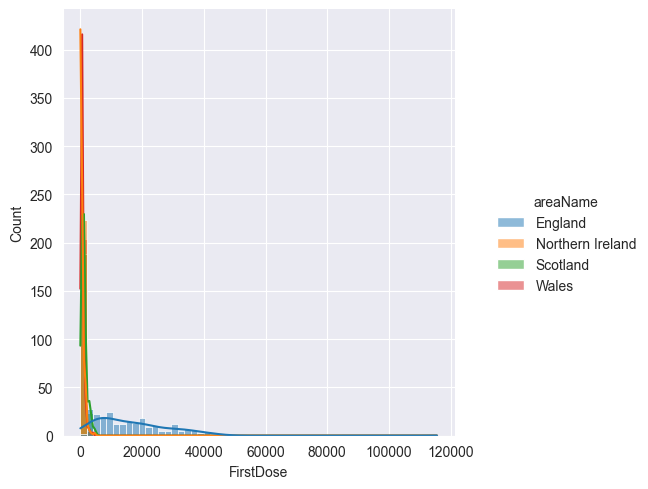

In [5]:
sns.displot(data, x="FirstDose", hue="areaName", bins=55, kde=True)

As it can be seen, it is confusing and data cannot be visually understood reasonably.

To fix that, the logarithmic transformation will be used 

In [6]:
data.loc[:, "fd_log"] = np.log(data["FirstDose"])
data.loc[:, "sd_log"] = np.log(data["SecondDose"])
data.loc[:, "td_log"] = np.log(data["ThirdDose"])

C:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Now to individually show the distribution of each continuous variable

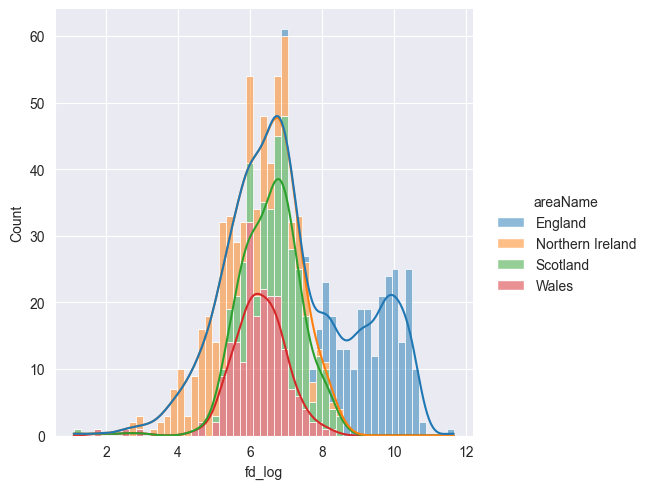

In [7]:
sns.displot(data, x="fd_log", hue="areaName", bins=55, multiple="stack", kde=True)

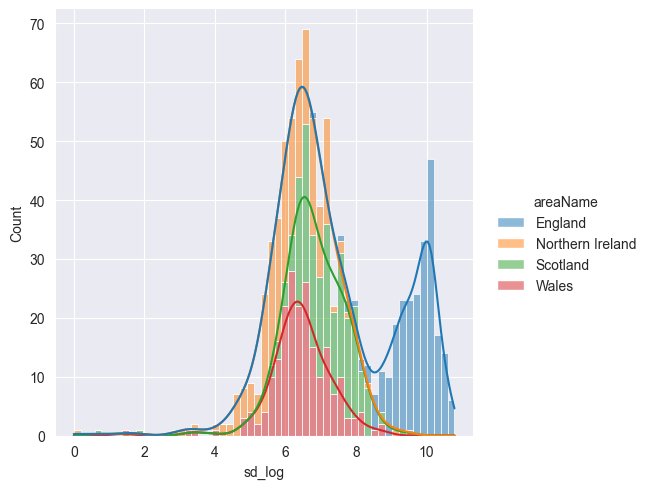

In [8]:
sns.displot(data, x="sd_log", hue="areaName", bins=55, multiple="stack", kde=True)

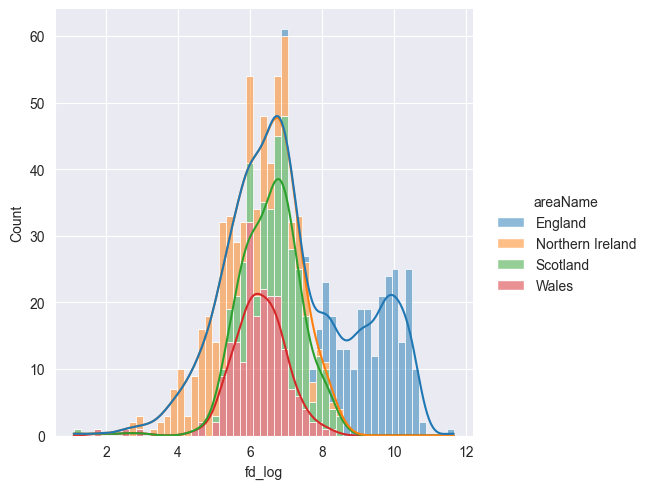

In [9]:
sns.displot(data, x="fd_log", hue="areaName", bins=55, multiple="stack", kde=True)

From here we can see clear distinction between England and rest of listed areas. England the biggest region in the United Kingdom, which makes the fact that number of vaccinations in that area will be far greater predictable. 

Out of other regions listed, Scotland is the second in the number of vaccinations, Wales third and Northern Ireland has the least number of vaccinations in listed regions. 



### 3 B


Here it can be seen the correlation coefficient with scatterplot beneath each one.


First to Second dose variable corr coefficient: 0.83443


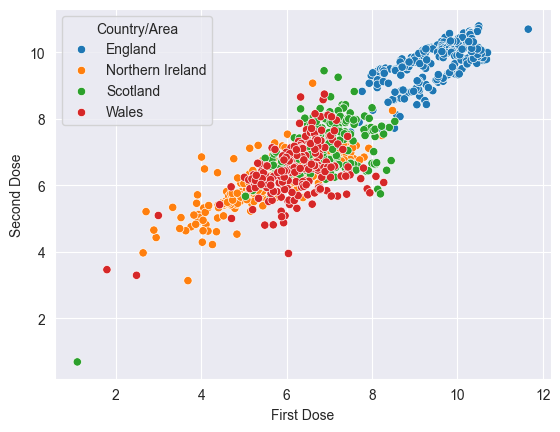

In [10]:
ax = sns.scatterplot(data=data, x="fd_log", y="sd_log", hue="areaName")

legend = ax.legend()

legend.set_title("Country/Area")

ax.set_xlabel("First Dose")
ax.set_ylabel("Second Dose")
# if accounting that pearson's coefficient is more 
print(f"First to Second dose variable corr coefficient: {data['FirstDose'].corr(data["SecondDose"], method="pearson"):.5f}")

plt.show()

Second to Third dose corr coefficient: 0.76561


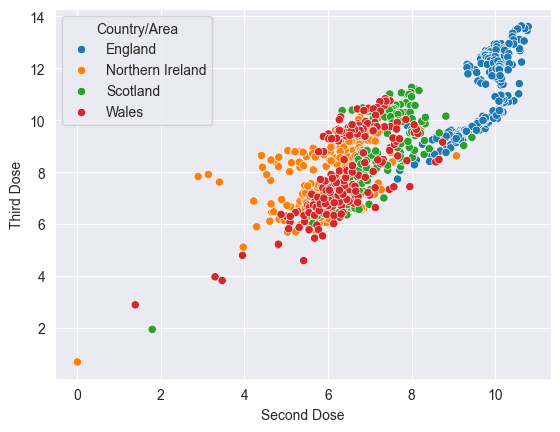

In [11]:
ax = sns.scatterplot(data, x="sd_log", y="td_log", hue="areaName")

legend = ax.legend()
legend.set_title("Country/Area")

ax.set_xlabel("Second Dose")
ax.set_ylabel("Third Dose")

print(f"Second to Third dose corr coefficient: {data["SecondDose"].corr(data["ThirdDose"], method="pearson"):.5f}")

plt.show()

Third to First dose variable corr coefficient: 0.76833


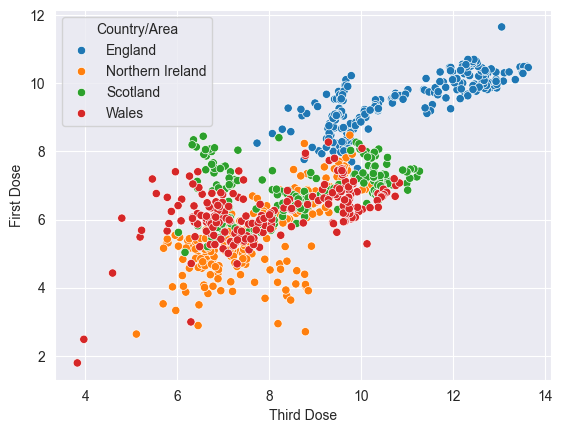

In [12]:
ax = sns.scatterplot(data, x="td_log", y="fd_log", hue="areaName")

legend=ax.legend()

legend.set_title("Country/Area")
ax.set_xlabel("Third Dose")
ax.set_ylabel("First Dose")

print(f"Third to First dose variable corr coefficient: {data["ThirdDose"].corr(data["FirstDose"], method="pearson"):.5f}")
plt.show()

I believe we can see that correlation is quite volatile here. Correlation coefficients are mostly similar to each other and each one of them is at least 0.3 points close to 1, which makes it obvious that they are related and to a heavy extent. However, it can be seen that skewness is quite different, as England has far greater number of vaccinations per day than other three areas, it makes the data uneven. Especially this can be seen in the second and third scatter plots, as the gap in the data makes correlation coefficients lower than the first one. However, it mainly points to the skewness of data, which is flawed, which might become the challenge in the future analysis.   

### 3 C


Date might be the factor in receiving the vaccinations in all countries, as first, second and third doses variables in its names imply that they might have a recorded in different times. Let's review that possibility by plotting it onto the Histogram/KDE distribution plot again

For clarity's sake, I will put a year and a month into date-time format as a string into a new column in the DataFrame

In [13]:
#elimanate any zeroes in the DataFrame, as some have been detected in the Year Column
def find_zero_year(year, month) -> float:
    if year == 0 :
        if 0 < month <= 5:
            y = 2022
            return float(y)
        elif 9 <= month <= 12:
            y = 2021
            return float(y)
    else: return float(0)
#step forward for step 8, to show description of Quarter-indexed Continuous Variables
def find_zero_quarter(month, quarter) -> float:
    if quarter == 0: 
        if 0 < month <= 3:
            q = 1
            return float(q)
        elif 4 <= month <= 6:
            q = 2
            return float(q)
        elif 7 <= month <= 9:
            q = 3
            return float(q)
        elif 10 <= month <= 12:
            q = 4
            return float(q)
    else: return float(0)
    
#use function above and iterate through rows
#for performance, change only the ones that are actually 0.0
for i, row in data.iterrows():
    true_year = find_zero_year(row["year"], row["month"])
    true_q = find_zero_quarter(row["month"], row["Quarter"])
    if true_year != 0:
        data.at[i, "year"] = true_year
    elif true_q != 0:
        data.at[i, "Quarter"] = f"Q{true_q:.0f}"

#create a numpy array to hold data, to create a new column with datetime objects in it
formatted_values = np.array([], dtype=object)

#iterate through rows to receive the data and append it into np array
for _, row in data.iterrows():
    #convert the year and month columns into a datetime object
    formatted_date = pd.to_datetime(f"{row['year']:.0f}-{row['month']:.0f}")
    #append the formatted date to the numpy array
    formatted_values = np.append(formatted_values, formatted_date)

#create the above-named column
data['date'] = formatted_values
#show change
data


,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster,fd_log,sd_log,td_log,date
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0,1,8.017637,8.257645,9.076466,2022-05-01
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0,0,8.581294,8.110728,8.469472,2022-05-01
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0,0,9.536185,9.185945,9.420196,2022-05-01
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0,0,8.668712,8.617762,9.277251,2022-05-01
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0,0,9.040619,8.849084,9.367430,2022-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Wales,W92000004,2021.0,10,Q4,Mon,Yes,3266.0,528.0,22390.0,0,8.091321,6.269096,10.016370,2021-10-01
900,Wales,W92000004,2021.0,10,Q4,Sun,No,2831.0,322.0,6546.0,0,7.948385,5.774552,8.786609,2021-10-01
901,Wales,W92000004,2021.0,10,Q4,Sat,No,3921.0,439.0,10787.0,0,8.274102,6.084499,9.286097,2021-10-01
902,Wales,W92000004,2021.0,10,Q4,Fri,Yes,1238.0,717.0,18583.0,0,7.121252,6.575076,9.830002,2021-10-01


As you can see, newly created date column is actually additionally going with 1 at the end, however it more shows that the datetime object does not have the day in its date, which is exactly what is required to show good data. And as it can be seen in the next graph that it shows as intended in the graph. 

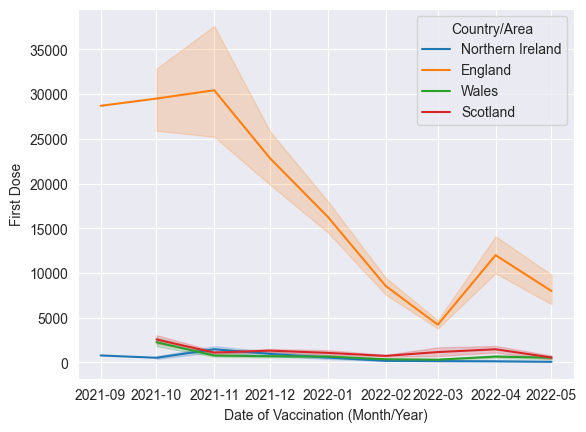

In [14]:
sorted_data = data.sort_values(by=['date'])
ax = sns.lineplot(sorted_data, x="date", y="FirstDose", hue="areaName" )

legend = ax.legend()

legend.set_title("Country/Area")

ax.set_xlabel("Date of Vaccination (Month/Year)")
ax.set_ylabel("First Dose")

plt.show()

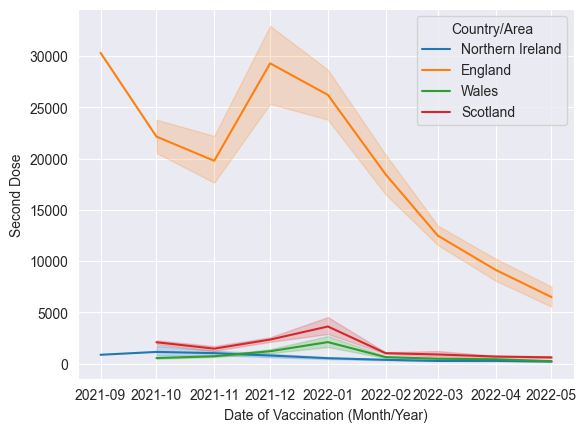

In [15]:
ax = sns.lineplot(data=sorted_data, x="date", y="SecondDose", hue="areaName" )

legend = ax.legend()

legend.set_title("Country/Area")

ax.set_xlabel("Date of Vaccination (Month/Year)")
ax.set_ylabel("Second Dose")

plt.show()

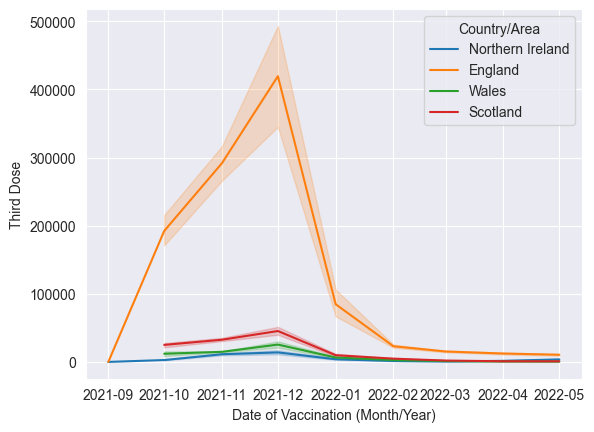

In [16]:
ax = sns.lineplot(sorted_data, x="date", y="ThirdDose", hue="areaName")

legend = ax.legend()

legend.set_title("Country/Area")

ax.set_xlabel("Date of Vaccination (Month/Year)")
ax.set_ylabel("Third Dose")

plt.show()


As we can see the spike is at the later date for both Second and Third Dose, which can show something to a difference, however mostly the change does not appear to be significant, which can mean that bias of an estimator might play a bit of a role here.

# Step 4

Next step is to show unique values of categorical variables. The variables we will check will be Month, Area Code and Area Name, as variables like Booster, Year, Day and Quarter will be not as unique as those can be

In [17]:
print(data['month'].value_counts())
print(df['month'].value_counts())

month
1     123
12    120
4     119
3     119
11    118
2     112
10     92
5      86
9       2
Name: count, dtype: int64
month
3     124
1     124
12    124
4     120
11    120
2     112
10     92
5      86
9       2
Name: count, dtype: int64


9 (September 2021) are for the rare occurrences of very early-bird vaccinations. However, even with unfiltered data, only 2 occurrences can be seen. 

In [18]:
#filtered
print(data['areaCode'].value_counts())
#unfiltered
print(df['areaCode'].value_counts())

areaCode
E92000001    236
N92000002    230
S92000003    215
W92000004    210
Name: count, dtype: int64
areaCode
E92000001    236
N92000002    236
S92000003    222
W92000004    210
Name: count, dtype: int64


No unique values in both filtered and unfiltered dataframes.

In [19]:
#filtered
print(data['areaName'].value_counts())
#unfiltered
print(df['areaName'].value_counts())

areaName
England             236
Northern Ireland    230
Scotland            215
Wales               210
Name: count, dtype: int64
areaName
England             236
Northern Ireland    236
Scotland            222
Wales               210
Name: count, dtype: int64


Same situation here, no unique values. This shows that it is quite easy to discount the unfiltired data, as it does not give huge change

# Step 5 

Let's conduct a chi-square test of independence. The two categorical Variables that are most likely to be related and can be interesting is Area Name and Booster as both of those can show opinions of people in different areas. 

So the Hypotheses are:

$$H_0: Area\ name\ and\ possibility\ of\ people\ taking\ booster\ vaccine\ on\ that\ day\ in\ that\ area\ are\ independent$$
$$H_1: Area\ name\ and\ possibility\ of\ people\ taking\ booster\ vaccine\ on\ that\ day\ in\ that\ area\ are\ dependent$$

In [20]:
cont_table = pd.crosstab(data["areaName"], data["Booster"], values=data["areaName"], aggfunc="count", margins=True)
cont_table

Booster,0,1,All
areaName,,,
England,95,141,236
Northern Ireland,70,160,230
Scotland,60,155,215
Wales,80,130,210
All,305,586,891


We can see that variables did not depend too heavily from what the contingency table shows. However, it is a must to check for sure with the Chi-square Independence test

In [21]:
chi2, p, dof, exp_freq = sp.chi2_contingency(cont_table)
print(f"""
    Chi-square independence test for Area Name and Booster: 
    Chi2 Statistic: {chi2:.5f},
    P-Value: {p:.5f},
    Degrees of Freedom: {dof},
    Expected Frequency: 
        0: England - {exp_freq[0][0]:.5f}; Northern Ireland - {exp_freq[1][0]:.5f}; Scotland - {exp_freq[2][0]:.5f}; Wales - {exp_freq[3][0]:.5f}; 
        1: England - {exp_freq[0][1]:.5f}; Northern Ireland - {exp_freq[1][1]:.5f}; Scotland - {exp_freq[2][1]:.5f}; Wales - {exp_freq[3][1]:.5f}; 
        Total Count: {exp_freq[4][2]:.0f}
""")


    Chi-square independence test for Area Name and Booster: 
    Chi2 Statistic: 10.48745,
    P-Value: 0.23246,
    Degrees of Freedom: 8,
    Expected Frequency: 
        0: England - 80.78563; Northern Ireland - 78.73176; Scotland - 73.59708; Wales - 71.88552; 
        1: England - 155.21437; Northern Ireland - 151.26824; Scotland - 141.40292; Wales - 138.11448; 
        Total Count: 891



As it can be seen, p-value is below 0.05 constant and it shows that the values are in fact dependent and we can reject the null hypothesis. Expected Frequencies can show how far actual values are from its means, and as we can see some of them are completely off the mark. There is also a way of determining the actual relation to each other via the Coefficient of Determination (see Step 9)

# Step 6

It was shown and is quite obvious that category that is most relative in the overall dataset is the Area Name, by which the subsets of rows will be extracted. It is important to acknowledge that the author of this analysis counts Third Dose as a booster vaccine dose and also that previously created 

In [22]:
subset_eng = data[data["areaName"] == "England"]
subset_ni = data[data["areaName"]=="Northern Ireland"]
subset_scot = data[data["areaName"]=="Scotland"]
subset_wal = data[data["areaName"]=="Wales"]

In [23]:
subset_eng.loc[:, "year": "Booster"].describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2021.605932,6.084746,16869.427966,18469.016949,135932.275424,0.597458
std,0.489688,4.133056,12752.457581,9615.471011,172148.427198,0.491452
min,2021.000000,1.000000,955.000000,916.000000,0.000000,0.000000
25%,2021.000000,2.750000,7088.250000,10887.000000,14608.500000,0.000000
50%,2022.000000,4.000000,14223.000000,17904.000000,32763.000000,1.000000
75%,2022.000000,11.000000,23470.250000,24306.500000,223345.750000,1.000000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000,1.000000


From the count it can be seen that td_log and ThirdDose has one missing, which means that on one of the days there were no booster vaccines at all. However, we can see that ThirdDose is much more prevalent in terms of numbers in England and we will account and check for that in other areas. Booster, however got only mean of 59.75%, which is not surprising considering that First and Second Doses had quite big of a number combined as well.  

In [24]:
subset_ni.loc[:, "year": "Booster"].describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2021.608696,6.060870,509.404348,588.869565,4907.969565,0.695652
std,0.489107,4.122125,661.564539,694.183351,5914.348628,0.461134
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.250000,117.500000,255.250000,899.250000,0.000000
50%,2022.000000,4.000000,229.000000,434.500000,2128.500000,1.000000
75%,2022.000000,10.750000,618.500000,746.750000,6551.500000,1.000000
max,2022.000000,12.000000,4815.000000,8677.000000,30803.000000,1.000000


The Third Dose number is still prevalent, however we can see that the Booster variable mean is also much higher than in England, which means that most citizens of Northern Ireland had taken mostly booster vaccines in the recorded period.   

In [25]:
subset_scot.loc[:, "year": "Booster"].describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2021.641860,5.832558,1204.455814,1620.218605,15211.655814,0.720930
std,0.480572,4.137797,936.422570,1449.835851,17562.757473,0.449589
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,587.500000,719.500000,1248.500000,0.000000
50%,2022.000000,4.000000,995.000000,1212.000000,5908.000000,1.000000
75%,2022.000000,11.000000,1496.500000,2132.000000,29261.000000,1.000000
max,2022.000000,12.000000,5082.000000,12612.000000,78146.000000,1.000000


Even bigger mean value is recorded in Scotland for Booster variable, which shows that the Third Dose is also much more prevalent.

In [26]:
subset_wal.loc[:, "year": "Booster"].describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2021.657143,5.723810,655.166667,856.247619,8153.323810,0.619048
std,0.475798,4.188147,546.435527,864.316111,10358.619337,0.486781
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,342.250000,386.250000,919.000000,0.000000
50%,2022.000000,4.000000,510.000000,604.000000,2420.500000,1.000000
75%,2022.000000,11.000000,828.000000,974.750000,14593.500000,1.000000
max,2022.000000,12.000000,3921.000000,6247.000000,50524.000000,1.000000


Here we can see results closer to the Northern Ireland and it shows more of an average number of third doses. Overall, accounting for every one of those subsets, it can be seen that there is quite a huge difference in number of Third Doses over First and Second Doses. However, as a general statistics rule, I am inclined to believe that English subset is much more precise due to its high numbers in people who accepted doses on the day, which most likely means that the mean of Booster value in Scotland Subset is exaggerated due to its low numbers. As it stands, people from most countries still preferred to take Booster Vaccine, and although range like 50-60% is not showing that much of preference in taking the vaccine, however somehow invalidates possible bias towards public being scared of vaccines. Test between means will be conducted in the next step.

# Step 7

To test the significance of means between likeliness of booster vaccines being used, independent two-sample t-test will be used, as citizens of Northern Ireland and England are not same people. For that only England and Scotland subsets will be used only as samples, as they are the most apparent in terms of degree of change and overall numbers of population vaccinated. However before that, here are the Hypotheses:

$$H_0: Difference\ between\ means\ of\ boosters=0$$
$$H_1: Difference\ between\ means\ of\ boosters\neq 0$$

In [27]:
#extracting only relevant numeric values
num_eng = subset_eng.loc[:, "Booster"]
num_scot = subset_scot.loc[:, "Booster"]

t_stat, p = sp.ttest_ind(num_eng, num_scot, equal_var=False)

print(f"T-Statistic: {t_stat:.5f}")
print(f"P-Value: {p:.5f}")

T-Statistic: -2.78644
P-Value: 0.00555


As we can see, p-value of t-test shows that we can reject null hypothesis as it is lower than 0.05, which means that the difference between means of boosters does not equal to 0. It means that overall difference between means is quite great, and it only shows towards that the results I have interpreted before are correct. Scotland is in favour of Booster much more than England is. 

# Step 8

At this moment, the data will be grouped into tables indexed by categorical variables, and summarised by the mean statistic. Also, it is important to point out that the data will use Date categorical Variable to not repeat analysis, and area code will be omitted, as it is almost the same as area name, and will not show any unique information (as proven in step 4).

In [28]:
data.dtypes

areaName              object
areaCode              object
year                 float64
month                  int64
Quarter               object
day                   object
WorkingDay            object
FirstDose            float64
SecondDose           float64
ThirdDose            float64
Booster                int64
fd_log               float64
sd_log               float64
td_log               float64
date          datetime64[ns]
dtype: object

In [29]:
#Area Name
grouped_area = data.groupby('areaName')[['FirstDose', 'SecondDose', 'ThirdDose', 'Booster']].mean()
grouped_area

,FirstDose,SecondDose,ThirdDose,Booster
areaName,,,,
England,16869.427966,18469.016949,135932.275424,0.597458
Northern Ireland,509.404348,588.869565,4907.969565,0.695652
Scotland,1204.455814,1620.218605,15211.655814,0.720930
Wales,655.166667,856.247619,8153.323810,0.619048


In [30]:
#Date
grouped_date = data.groupby('date')[['FirstDose', 'SecondDose', 'ThirdDose', 'Booster']].mean()
grouped_date

,FirstDose,SecondDose,ThirdDose,Booster
date,,,,
2021-09-01,14733.000000,15591.000000,0.000000,0.000000
2021-10-01,10913.815217,8341.315217,72338.152174,0.347826
2021-11-01,8558.669492,5827.737288,88922.838983,0.423729
2021-12-01,6616.300000,8624.541667,129030.608333,0.791667
2022-01-01,4664.382114,8178.178862,26425.081301,0.845528
2022-02-01,2452.116071,5122.776786,7975.500000,0.955357
2022-03-01,1476.201681,3644.991597,4951.957983,0.823529
2022-04-01,3585.823529,2653.378151,3939.521008,0.420168
2022-05-01,2403.930233,1998.988372,4165.686047,0.581395


In [31]:
#Quarter
grouped_quarter = data.groupby('Quarter')[['FirstDose', 'SecondDose', 'ThirdDose', 'Booster']].mean()
grouped_quarter

,FirstDose,SecondDose,ThirdDose,Booster
Quarter,,,,
Q1,2892.723164,5687.629944,13369.559322,0.872881
Q2,3090.004878,2378.853659,4034.400000,0.487805
Q3,14733.000000,15591.000000,0.000000,0.000000
Q4,8508.939394,7545.512121,98883.872727,0.536364


In [32]:
#Day 
grouped_day = data.groupby("day")[["FirstDose", "SecondDose", "ThirdDose", "Booster"]].mean()
grouped_day

,FirstDose,SecondDose,ThirdDose,Booster
day,,,,
0,297.000000,896.000000,752.000000,0.000000
Fri,5027.642857,5668.055556,42525.984127,0.690476
Mon,4453.248062,4946.682171,37776.085271,0.713178
Sat,5691.856000,6943.792000,49008.544000,0.528000
Sun,3618.692913,4272.535433,29254.708661,0.582677
Thu,5459.875969,6010.000000,47147.395349,0.705426
Tue,5197.456693,5632.598425,45416.685039,0.692913
Wed,5914.842520,6046.283465,49354.834646,0.692913


In [33]:
grouped_wrkday = data.groupby("WorkingDay")[["FirstDose", "SecondDose", "ThirdDose", "Booster"]].mean()
grouped_wrkday

,FirstDose,SecondDose,ThirdDose,Booster
WorkingDay,,,,
0,296.000000,689.500000,6395.500000,1.000000
No,4647.047619,5597.563492,39053.238095,0.555556
Yes,5217.021978,5667.695447,44485.631083,0.697017


In short, Working Day and day variables show not much of a difference between the days and mean between it, especially when it mixed between countries. What is interesting that means between First and Third Doses in different quarters change significantly, which can partly prove bias which author expressed in Step 3c, however using the same data with Month/year I also shown how it could be partly-true and, therefore make a certifiable bias. Area name is something that is expected after using it to express so much data in previous steps.

# Step 9

At last, we will conduct multiple linear regression calculating Logistic Regression, as dependent values tested are binary As always, what is needed at first is declaring Hypotheses, is Beta 1, 2 and 3 are for coefficients of First, Second and Third Dose respectively:

$$H_0: \beta_1 = \beta_2 = \beta_3 = 0 $$
$$H_1: \beta_1 \neq 0\ or\ \beta_2 \neq 0\ or\ \beta_3 \neq 0  $$

Regression would be between First, Second and Third Doses as independent numerical variables (constant X) and Booster as a dependent one (y) using statsmodels library. 

In [34]:
X = data.loc[:, "FirstDose":'ThirdDose']
y = data.loc[:, "Booster"]
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.405246
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Booster   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.3693
Time:                        16:53:01   Log-Likelihood:                -361.07
converged:                       True   LL-Null:                       -572.52
Covariance Type:            nonrobust   LLR p-value:                 2.438e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7956      0.100      7.989      0.000       0.600       0.991
FirstDose     -0.0016      0.000     -9.824      0.000      -0.002      -0.001
SecondDose     0.0011      0.000      8.750      0.000       0.001       0.001
ThirdDose   2.838e-05   5.58e-06      5.089      0.000    1.74e-05    3.93e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

It can be seen from the Summary a few important to us values: P-value, Coefficients of all three independent variables, Standard Error and Pseudo R-squared. Pseudo R-Squared gave us the accuracy score needed, showing that accuracy of this test is 36.93% as it stands. Coefficients are mostly above zero, even if within quite small of a range, and it is proven by the p-value which is far beneath 0.05, which allows to reject null hypothesis.

For that, we can see that standard error is quite small for all of the independent variables as well, and that can also be shown with the p-value.

##### In conclusion, it is quite clear that the data has huge of potential in analysis and it would be very valuable to revisit it for further evaluation. Especially the points that can be looked into are: Relationship between Working Days and number of Doses per day, Quarterly report of Doses and Booster Doses and Relationship between Days of the Week and Areas of Doses given, latter one in particular might show quite a bit about work and study culture, as well as Working Day analysis. 

##### And with that, Exploratory Data Analysis Project can be closed.